In [1]:
import pandas as pd
import ast
df = pd.read_csv('20052021.csv')

In [2]:
df.head()

,_id,created_at,tweet_content,keyword,user_location,entities,classification
0,ObjectId(6091f3547ef2d107a44055cc),2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,"{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."
1,ObjectId(6091f3547ef2d107a44055cd),2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,"{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."
2,ObjectId(6091f3547ef2d107a44055ce),2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,"{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."
3,ObjectId(6091f3547ef2d107a44055cf),2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil","{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":true,""created_at"":""2021-05-..."
4,ObjectId(6091f3547ef2d107a44055d0),2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil","{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."


In [3]:
df = df.drop('_id', 1)

## Separando o Json de classificação em diferentes colunas

In [4]:
df.classification[1]

'[{"classification":false,"created_at":"2021-05-10T12:43:36.439Z"},{"classification":true,"created_at":"2021-05-10T12:50:50.683Z"},{"classification":true,"created_at":"2021-05-10T13:03:11.475Z"}]'

In [5]:
classification_df = pd.DataFrame()

In [6]:
import numpy as np
import json

classification = df.classification.tolist()
for index in range(0, len(classification)):
    if classification[index] is np.nan:
        new_row = {
            'classification.1': 'n/a',
            'created_at.1': 'n/a',
            'classification.2': 'n/a',
            'created_at.2': 'n/a',
            'classification.3': 'n/a',
            'created_at.3': 'n/a'
        }
    else:
        classification_dict = eval(classification[index].replace('false', 'False').replace('true', 'True'))
        range_ = len(classification_dict)
        for teste in range(0, len(classification_dict)):
            try:
                if classification_dict[0]:
                    classification_1 = classification_dict[0]['classification']
                    created_at_1 = classification_dict[0]['created_at']
            except:
                classification_1 = 'n/a'
                created_at_1 = 'n/a'
            try:
                if classification_dict[1]:
                    classification_2 = classification_dict[1]['classification']
                    created_at_2 = classification_dict[1]['created_at']
            except:
                classification_2 = 'n/a'
                created_at_2 = 'n/a'
            try:
                if classification_dict[2]:
                    classification_3 = classification_dict[2]['classification']
                    created_at_3 = classification_dict[2]['created_at']
            except:
                classification_3 = 'n/a'
                created_at_3 = 'n/a'
            new_row = {
                'classification.1': classification_1,
                'created_at.1': created_at_1,
                'classification.2': classification_2,
                'created_at.2': created_at_2,
                'classification.3': classification_3,
                'created_at.3': created_at_3
            }
    classification_df = classification_df.append(new_row, ignore_index=True)

In [7]:
classification_df.head()

,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3
0,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z
1,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z
2,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z
3,1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z
4,0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z


In [8]:
classification_df.shape

(738, 6)

In [9]:
df.shape

(738, 6)

## Separando o Json de entities em diferentes colunas

In [10]:
df.entities[0]

"{'hashtags': [], 'urls': [], 'user_mentions': [], 'symbols': []}"

In [11]:
entities_df = pd.DataFrame()

In [12]:
entities = df.entities.tolist()
for index in range(0, len(entities)):
    if entities[index] is np.nan:
        new_row = {
            'hashtags': 'n/a',
            'urls': 'n/a',
            'user_mentions': 'n/a',
            'symbols': 'n/a'
        }
    else:
        entities_dict = eval(entities[index])
        try:
            if entities_dict:
                hashtags = entities_dict['hashtags']
                urls = entities_dict['urls']
                user_mentions = entities_dict['user_mentions']
                symbols = entities_dict['symbols']
                #print(user_mentions)
        except:
            hashtags = 'n/a'
            urls = 'n/a'
            user_mentions = 'n/a'
            symbols = 'n/a'

        new_row = {
            'hashtags': hashtags,
            'urls': urls,
            'user_mentions': user_mentions,
            'symbols': symbols
        }
    entities_df = entities_df.append(new_row, ignore_index=True)

In [13]:
entities_df.head()

,hashtags,symbols,urls,user_mentions
0,[],[],[],[]
1,[],[],[],[]
2,[],[],[],[]
3,[],[],[],[]
4,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '..."


In [14]:
entities_df.isna().sum()

hashtags         0
symbols          0
urls             0
user_mentions    0
dtype: int64

In [15]:
entities_df.shape

(738, 4)

## Concatenando no DF inicial para criar o DF final

In [16]:
df = df.drop('classification', 1)

In [17]:
df = df.drop('entities', 1)

In [18]:
df_final = pd.concat([df, classification_df], axis=1)

In [19]:
df_final = pd.concat([df_final, entities_df], axis=1)

In [20]:
df_final.shape

(738, 14)

In [21]:
df_final.head()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z,[],[],[],[]
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z,[],[],[],[]
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z,[],[],[],[]
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z,[],[],[],[]
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '..."


In [22]:
df_final.shape

(738, 14)

In [23]:
df_final.isna().sum()

created_at          0
tweet_content       0
keyword             0
user_location       1
classification.1    0
classification.2    0
classification.3    0
created_at.1        0
created_at.2        0
created_at.3        0
hashtags            0
symbols             0
urls                0
user_mentions       0
dtype: int64

# Análise exploratória

In [24]:
df_final["classification.1"] = df_final["classification.1"].replace([True], 1)
df_final["classification.1"] = df_final["classification.1"].replace([False], 0)

df_final["classification.2"] = df_final["classification.2"].replace([True], 1)
df_final["classification.2"] = df_final["classification.2"].replace([False], 0)

df_final["classification.3"] = df_final["classification.3"].replace([True], 1)
df_final["classification.3"] = df_final["classification.3"].replace([False], 0)

In [25]:
df_final.describe()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions
count,738,738,738,737,738,738,738,738,738,738,738,738,738,738
unique,691,728,10,377,3,3,3,667,541,407,7,1,1,250
top,2021-05-10 15:40:12,⚠️teste de caráter ⚠️\r\n\r\n Nike ou Adidas,['Nubank'],None,1,1,n/a,n/a,n/a,n/a,[],[],[],[]
freq,3,2,236,212,359,278,332,72,198,332,732,738,738,415


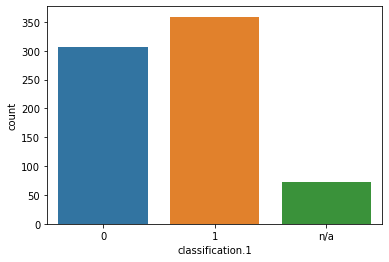

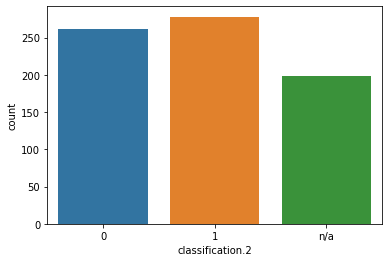

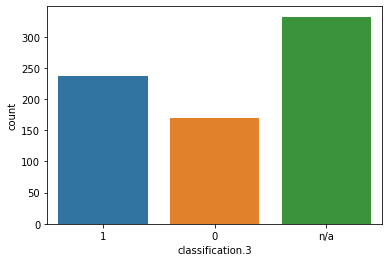

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="classification.1", data=df_final)
plt.show()
sns.countplot(x="classification.2", data=df_final)
plt.show()
sns.countplot(x="classification.3", data=df_final)
plt.show()

In [27]:
df_final["classification.3"].unique()

array([1, 0, 'n/a'], dtype=object)

In [28]:
def find_avg_sentiment(index):
    class_1 = df_final['classification.1'][index]
    class_2 = df_final['classification.2'][index]
    class_3 = df_final['classification.3'][index]
    
    if class_1 and class_2 and class_3 == 'n/a':
        avg_list = 'n/a'
        return avg_list
    elif class_2 and class_3 == 'n/a':
        avg_list = [class_1]
    elif class_3 == 'n/a':
        avg_list = [class_1, class_2]
    else:
        avg_list = [class_1, class_2, class_3]
    avg_classification = sum(avg_list)/len(avg_list)
    if avg_classification < 0.5:
        avg_sentiment = 0
    else:
        avg_sentiment = 1
    return avg_sentiment

In [29]:
avg_sentiment_list = []
for index in range(0,len(df_final)):
    avg_sentiment = find_avg_sentiment(index)
    avg_sentiment_list.append(avg_sentiment)
df_final['avg_sentiment'] = avg_sentiment_list

In [30]:
df_final.head()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z,[],[],[],[],0
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z,[],[],[],[],1
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z,[],[],[],[],0
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z,[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1


In [31]:
df_final.shape

(738, 15)

In [32]:
df_final['avg_sentiment'].nunique()

3

In [33]:
df_final['avg_sentiment'].unique()

array([0, 1, 'n/a'], dtype=object)

In [34]:
df_avg_sentiment = pd.DataFrame()

In [35]:
df_avg_sentiment = df_final

In [36]:
indexNames = df_avg_sentiment[(df_avg_sentiment['avg_sentiment'] == 'n/a')].index
df_avg_sentiment.drop(indexNames , inplace=True)

In [37]:
df_avg_sentiment.shape

(550, 15)

In [38]:
df_avg_sentiment.head()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z,[],[],[],[],0
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z,[],[],[],[],1
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z,[],[],[],[],0
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z,[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1


In [39]:
df_avg_sentiment['avg_sentiment'].unique()

array([0, 1], dtype=object)

In [40]:
df_avg_sentiment['avg_sentiment'] = df_avg_sentiment['avg_sentiment'].astype(int)

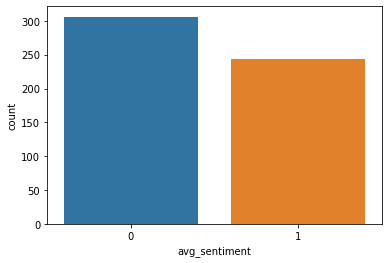

In [41]:
sns.countplot(x="avg_sentiment", data=df_avg_sentiment)
plt.show()

In [42]:
df_avg_sentiment['keyword'].unique()

array(["['Nubank']", "['Coca-cola']", "['Nike']", "['Xiaomi']",
       "['Coca cola']", "['SHEIN']", '[]', "['Boticário']",
       "['Nike', 'SHEIN']"], dtype=object)

In [43]:
df_avg_sentiment.columns

Index(['created_at', 'tweet_content', 'keyword', 'user_location',
       'classification.1', 'classification.2', 'classification.3',
       'created_at.1', 'created_at.2', 'created_at.3', 'hashtags', 'symbols',
       'urls', 'user_mentions', 'avg_sentiment'],
      dtype='object')

In [44]:
df_avg_sentiment = df_avg_sentiment[['created_at', 'tweet_content', 'keyword', 'user_location', 'hashtags', 'symbols', 'urls', 'user_mentions', 'avg_sentiment']]

In [45]:
df_avg_sentiment.to_csv('avg_sentiment.csv')
df_avg_sentiment.head()

,created_at,tweet_content,keyword,user_location,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,[],[],[],[],0
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,[],[],[],[],1
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,[],[],[],[],0
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1


In [46]:
df_avg_sentiment.shape

(550, 9)

<AxesSubplot:>

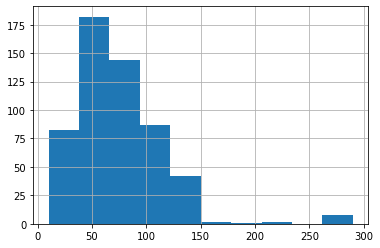

In [47]:
# Quantidade de caracteres por tweet
df_avg_sentiment['tweet_content'].str.len().hist()

# A maioria está entre 15 e 150 caracteres

In [48]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

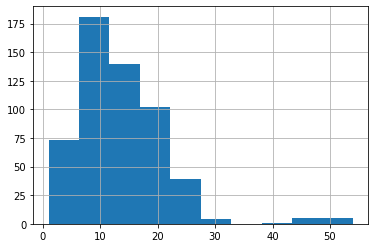

In [49]:
# Quantidade de palavras por tweet
plot_word_number_histogram(df_avg_sentiment['tweet_content'])

# A maioria está entre 2 a 25 palavras

In [50]:
def plot_average_word_lenght(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).hist()

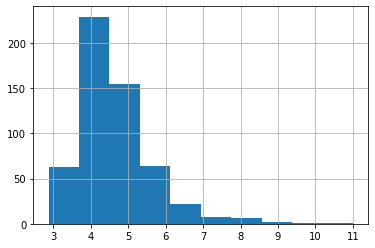

In [51]:
# Tamanho médio das palavras nos tweets
plot_average_word_lenght(df_avg_sentiment['tweet_content'])

In [52]:
# Removendo stop words
import nltk

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
stop=set(stopwords.words('portuguese'))
custom_stop=['pra', 'q', 'tá']

In [55]:
# Top Stopwords

import matplotlib.pyplot as plt
import numpy as np

def plot_top_stopwords_barchart(text):
   
    palavras = text.str.split()
    palavras = palavras.values.tolist()
    corpus = [palavra for i in palavras for palavra in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for palavra in corpus:
        if palavra in stop:
            dic[palavra] += 1
        if palavra in custom_stop:
            dic[palavra] += 1
            
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10] 
    x,y = zip(*top)
    plt.bar(x,y)

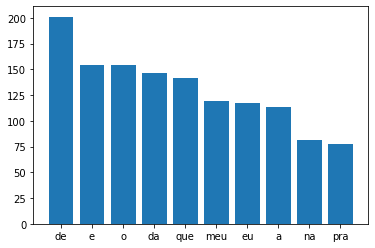

In [56]:
plot_top_stopwords_barchart(df_avg_sentiment['tweet_content'])

In [57]:
# Top Non Stopwords

import seaborn as sns
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    
    palavras = text.str.split()
    palavras = palavras.values.tolist()
    corpus = [palavra.lower() for i in palavras for palavra in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x,y = [],[]
    for palavra, count in most[:40]:
        if (palavra not in stop) and (palavra not in custom_stop):
            x.append(palavra)
            y.append(count)
            
    fig, ax = plt.subplots(figsize=(10,15))  
    sns.barplot(x=y,y=x,ax=ax)

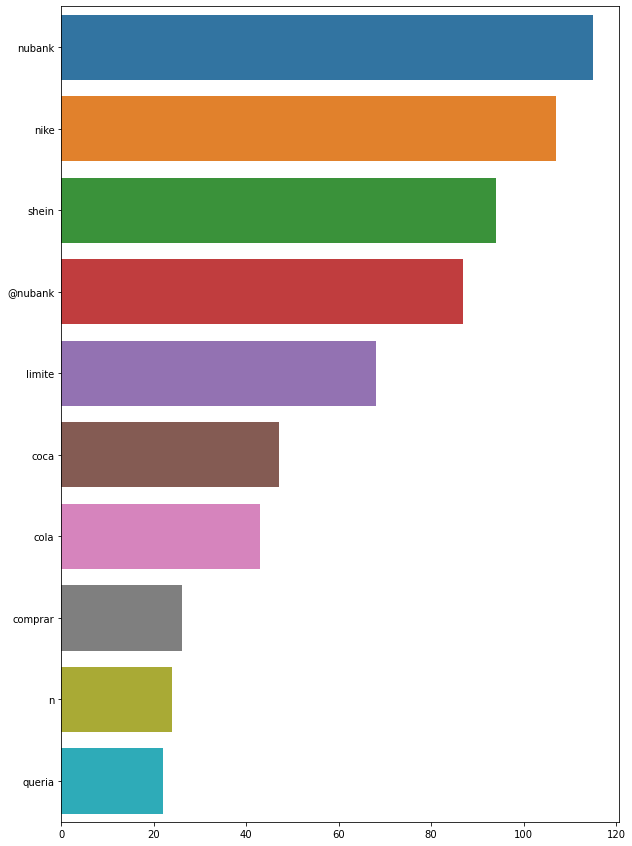

In [58]:
plot_top_non_stopwords_barchart(df_avg_sentiment['tweet_content'])

## Repartindo os dados em dataframes com tweets positivos e negativos

In [59]:
df_positive = df_avg_sentiment[df_avg_sentiment['avg_sentiment'] == 1]

In [60]:
df_positive.to_csv('positive.csv')
df_positive.head()

,created_at,tweet_content,keyword,user_location,hashtags,symbols,urls,user_mentions,avg_sentiment
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,[],[],[],[],1
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1
5,2021-05-04 12:31:34,Fui escolhido e Nubank aumentou 50 reais no me...,['Nubank'],"Ribeirão Preto, Brasil",[],[],[],[],1
6,2021-05-04 12:31:35,Vocês acham que esses preju que nubank teve at...,['Nubank'],"São Paulo, Brasil",[],[],[],[],1


In [61]:
df_negative = df_avg_sentiment[df_avg_sentiment['avg_sentiment'] == 0]

In [62]:
df_negative.to_csv('negative.csv')
df_negative.head()

,created_at,tweet_content,keyword,user_location,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,[],[],[],[],0
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,[],[],[],[],0
7,2021-05-04 12:31:46,@Rodrigolps_ No meu caso eu só observo a nuban...,['Nubank'],🏳️‍🌈,[],[],[],"[{'screen_name': 'Rodrigolps_', 'name': 'lovez...",0
8,2021-05-04 12:31:47,@msswx @nubank Processo neles,['Nubank'],Macaé,[],[],[],"[{'screen_name': 'msswx', 'name': 'Mari Siquei...",0
12,2021-05-04 12:32:31,"“Vou gastar tudo na Nike, cueca da Calvin Klein”",['Nike'],Hell not Helsinki,[],[],[],[],0


In [63]:
def plot_tweet_avg_lenght(df):
    # Quantidade de caracteres por tweet
    return df['tweet_content'].str.len().hist()

<AxesSubplot:>

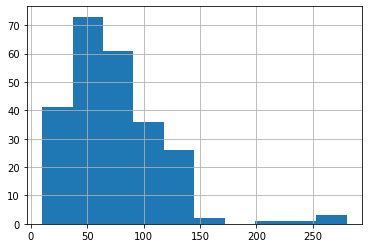

In [64]:
# Quantidade de caracteres por tweet positivo
# Sem a remoção das stopwords
plot_tweet_avg_lenght(df_positive)

<AxesSubplot:>

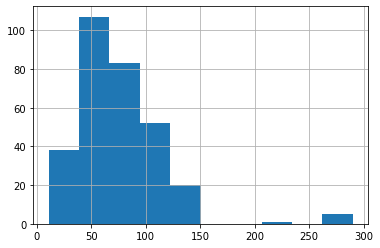

In [65]:
# Quantidade de caracteres por tweet negativo
# Com a remoção das stopwords
plot_tweet_avg_lenght(df_negative)

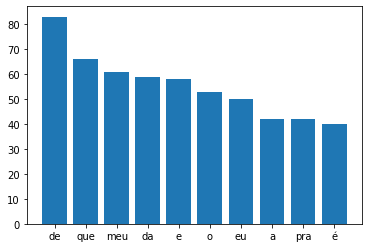

In [66]:
plot_top_stopwords_barchart(df_positive['tweet_content'])

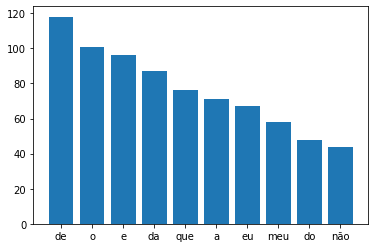

In [67]:
plot_top_stopwords_barchart(df_negative['tweet_content'])

- Tweets negativos têm uma média de X caracteres
- Tweets positivos têm uma média de X caracteres
- Encontrar as palavras mais frequentes para cada q não sejam stopwords

## Positivos

In [68]:
df_positive.head()

,created_at,tweet_content,keyword,user_location,hashtags,symbols,urls,user_mentions,avg_sentiment
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,[],[],[],[],1
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1
5,2021-05-04 12:31:34,Fui escolhido e Nubank aumentou 50 reais no me...,['Nubank'],"Ribeirão Preto, Brasil",[],[],[],[],1
6,2021-05-04 12:31:35,Vocês acham que esses preju que nubank teve at...,['Nubank'],"São Paulo, Brasil",[],[],[],[],1


In [69]:
from nltk.tokenize import word_tokenize
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [202]:
def limpar_texto(texto):
    '''
    Função para converter todas as letras para sua forma minúscula, selecionar apenas as letras,
    remover stopwords e lematizar o texto.  
    '''
    
    marcas = ['nubank', 'shein', 'nike', 'coca', 'cola', 'xiaomi', 'adidas', 'boticário']
    custom_stops = ['vai', 'vc', 'tô', 'to', 'aqui', 'tava', 'deu', 'gente',
                   'ta', 'hoje', 'hj', 'eh', 'n', 'c', 'so', 'vou', 'pq',
                   'acho', 'umas', 'uns', 'mano', 'dar', 'r', 'p', 'ai',
                   'dia', 'dois', 'mó', 'pra', 'x', 'q', 'pro', 'tbm',
                   'nu', 'manu', 'vivianlana_', '_gabriel_geno_', 'ir', 'cara',
                   'sep_bella_', 'nois', 'tão', 'rodrigobuenotv', 'vez', 'pode',
                   'usa', 'ser', 'sei', 'vcs', 'vei', 'estoy', 'né', 'ne', 's',
                   'd', 'la', 'en', 'tudo', 'todo', 'todos', 'aí', 'mt', 'nicole',
                   'nathalia', 'viu', 'drx', 'mi', 'dm', 'dá', 'tá']

    ### Transforme as letras para minúscula ###
    minusculas = texto.lower()
    
    ### Selecione apenas as letras do texto ##
    letras = re.findall(r'\b[A-zÀ-úü]+\b', minusculas) 
    
    ### Removendo as stopwords ###
    stops = set(stopwords.words('portuguese')) 
    # Retire as stopwords, nomes de marca e stopwords custom de letras
    palavras_sem_stopwords = [w for w in letras if w not in stops and w not in marcas and w not in custom_stops]
    # Junte as palavras sem stopwords 
    palavras_importantes = " ".join(palavras_sem_stopwords) 
    
    return palavras_importantes

In [72]:
df_positive_removed_stopwords = df_positive.copy()

In [203]:
df_positive_removed_stopwords['tweet_content'] = df_positive['tweet_content'].apply(limpar_texto)

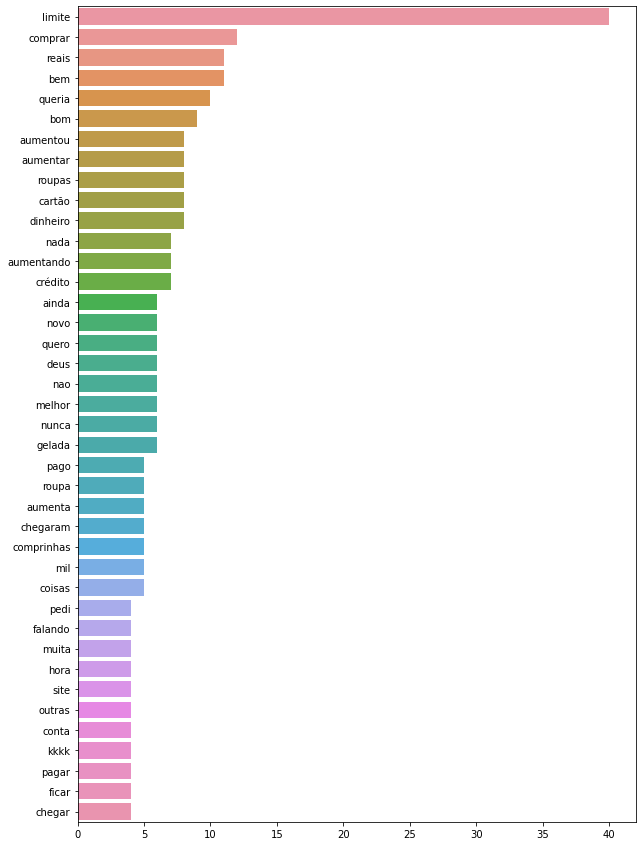

In [204]:
plot_top_non_stopwords_barchart(df_positive_removed_stopwords['tweet_content'])

In [205]:
!pip install wordcloud

In [206]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

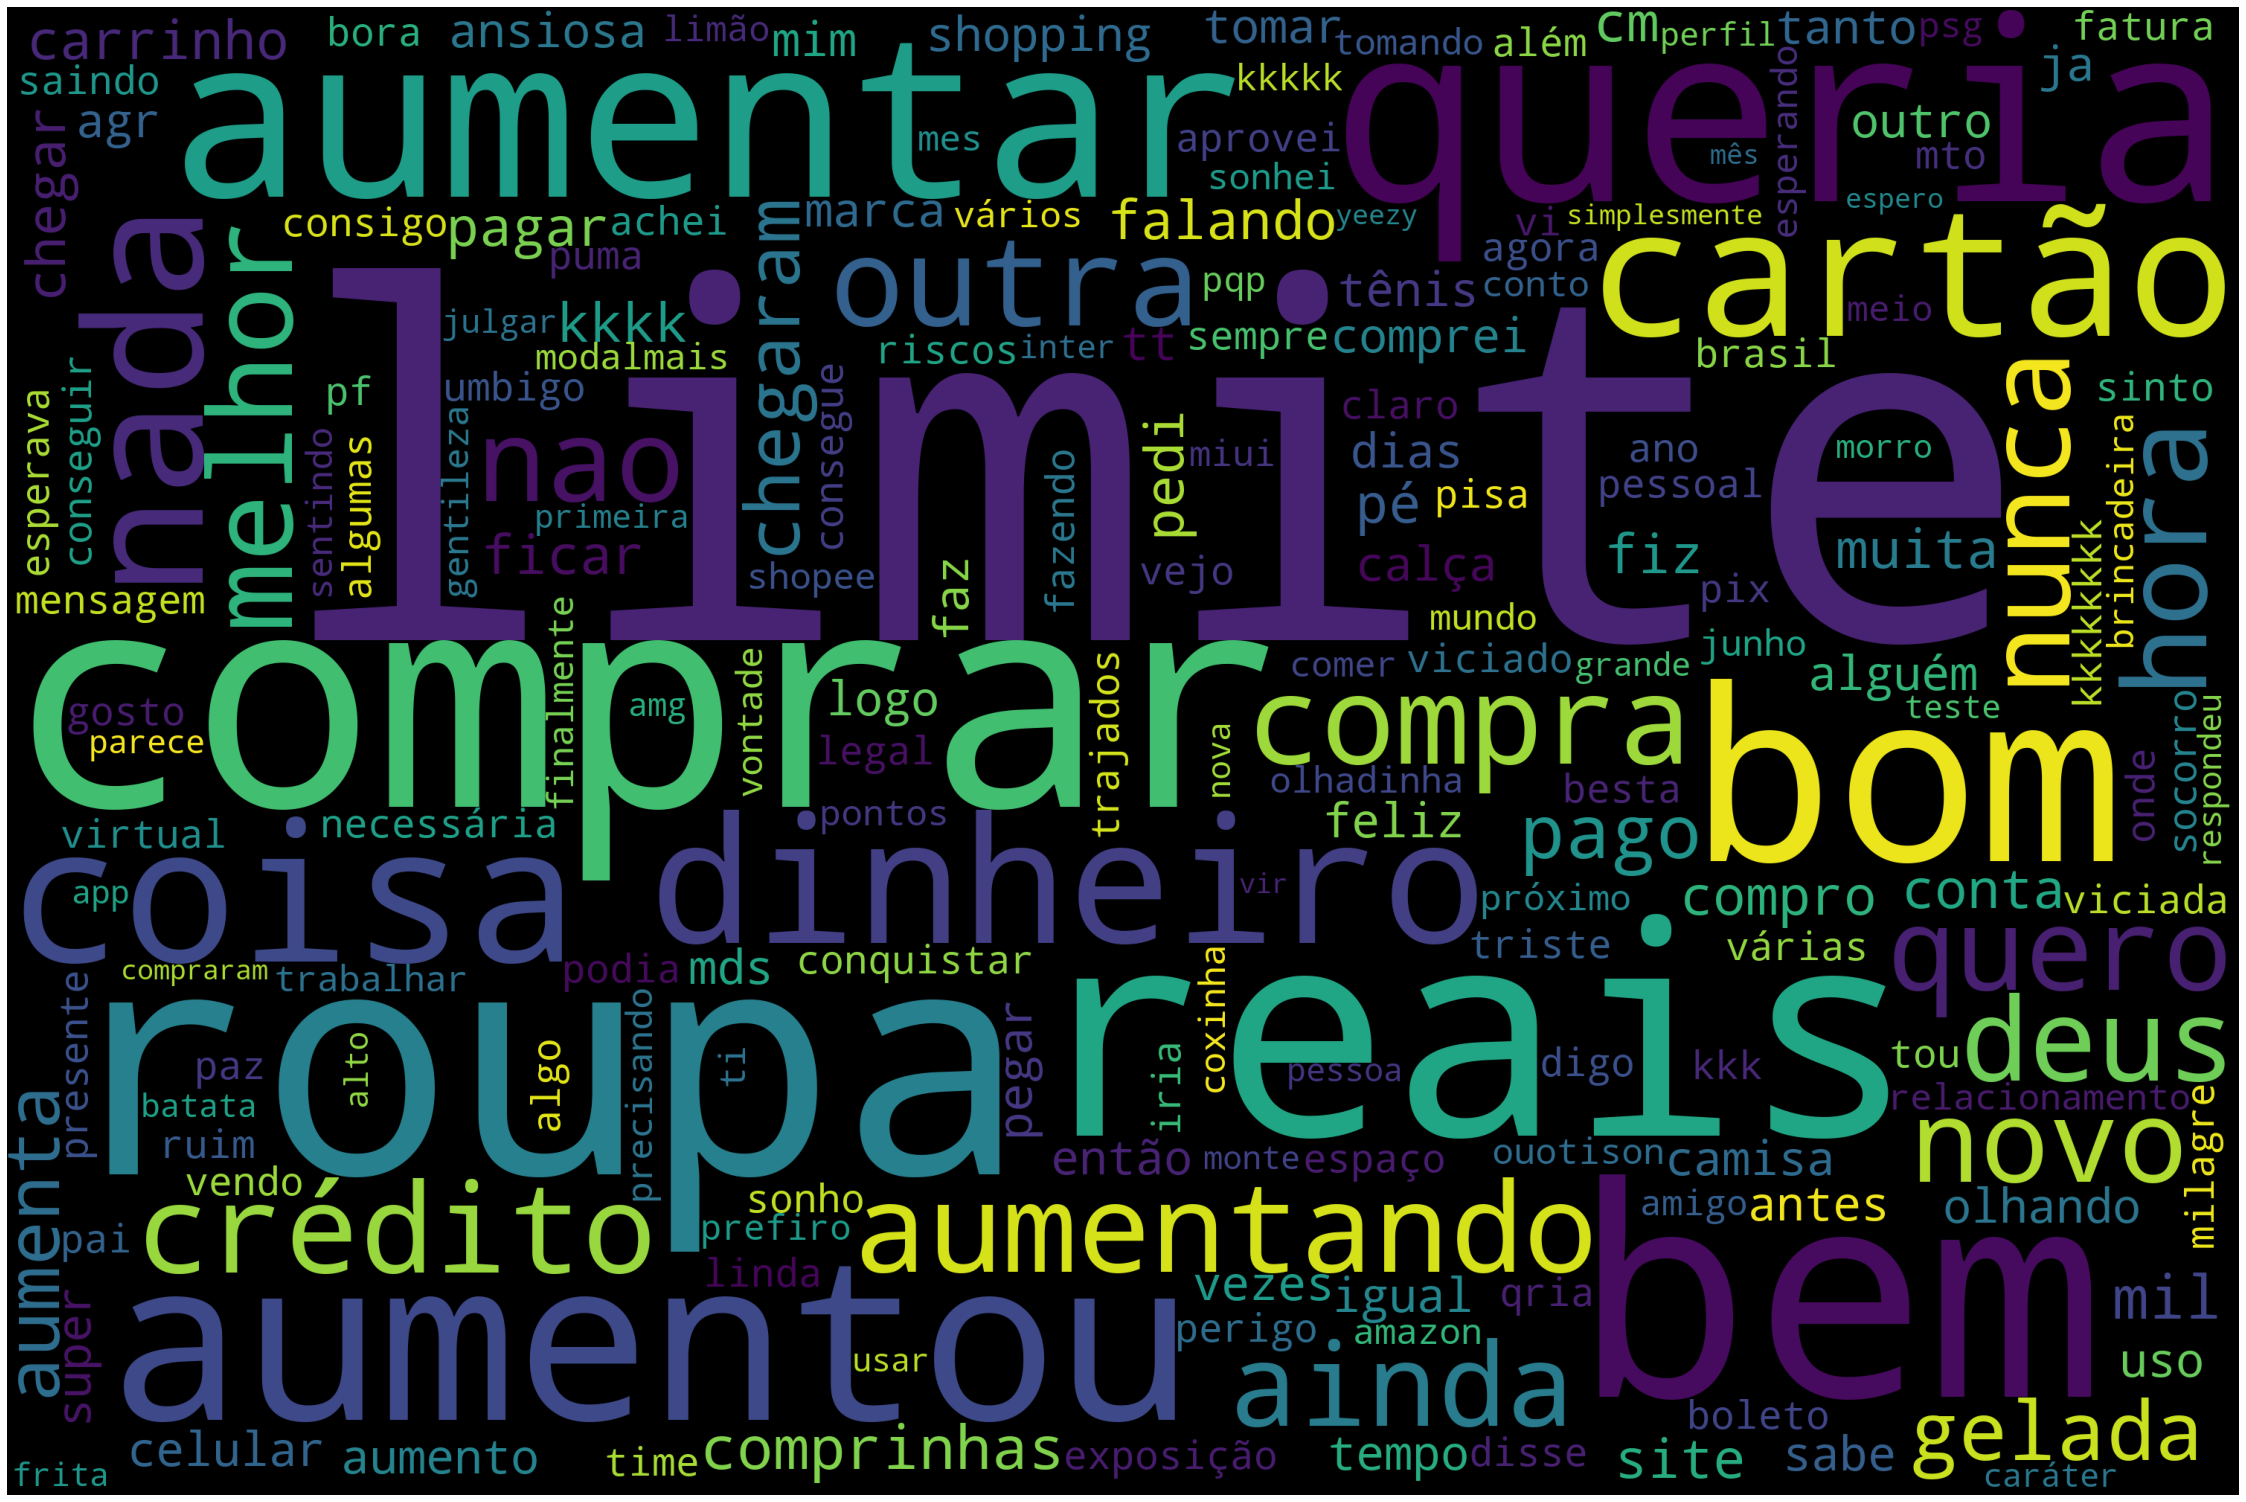

In [207]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      collocations=False).generate(' '.join(df_positive_removed_stopwords['tweet_content']))

plot_cloud(wordcloud)

In [208]:
wordcloud.to_file("img/positive_wordcloud.png")

## Negativos

In [158]:
df_negative_removed_stopwords = df_negative.copy()

In [209]:
df_negative_removed_stopwords['tweet_content'] = df_negative['tweet_content'].apply(limpar_texto)

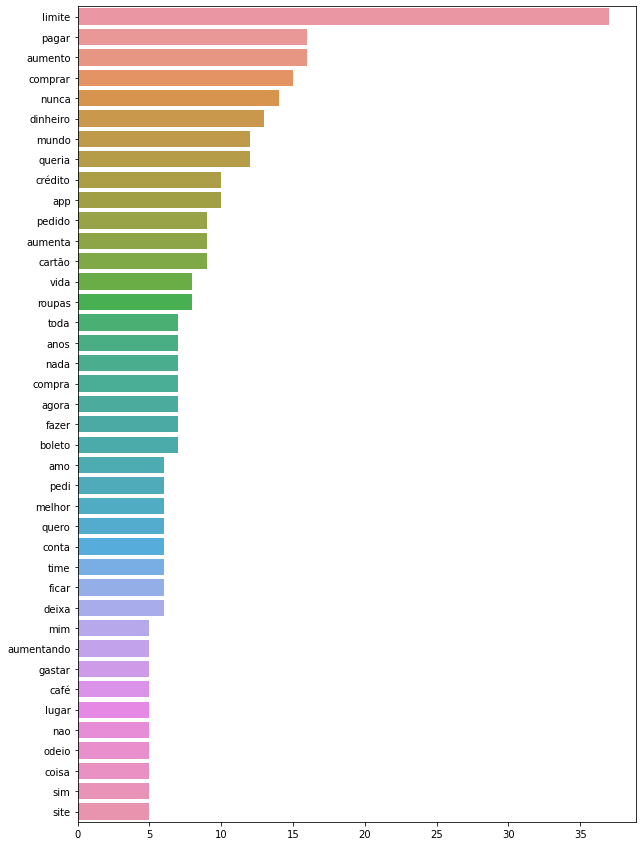

In [210]:
plot_top_non_stopwords_barchart(df_negative_removed_stopwords['tweet_content'])

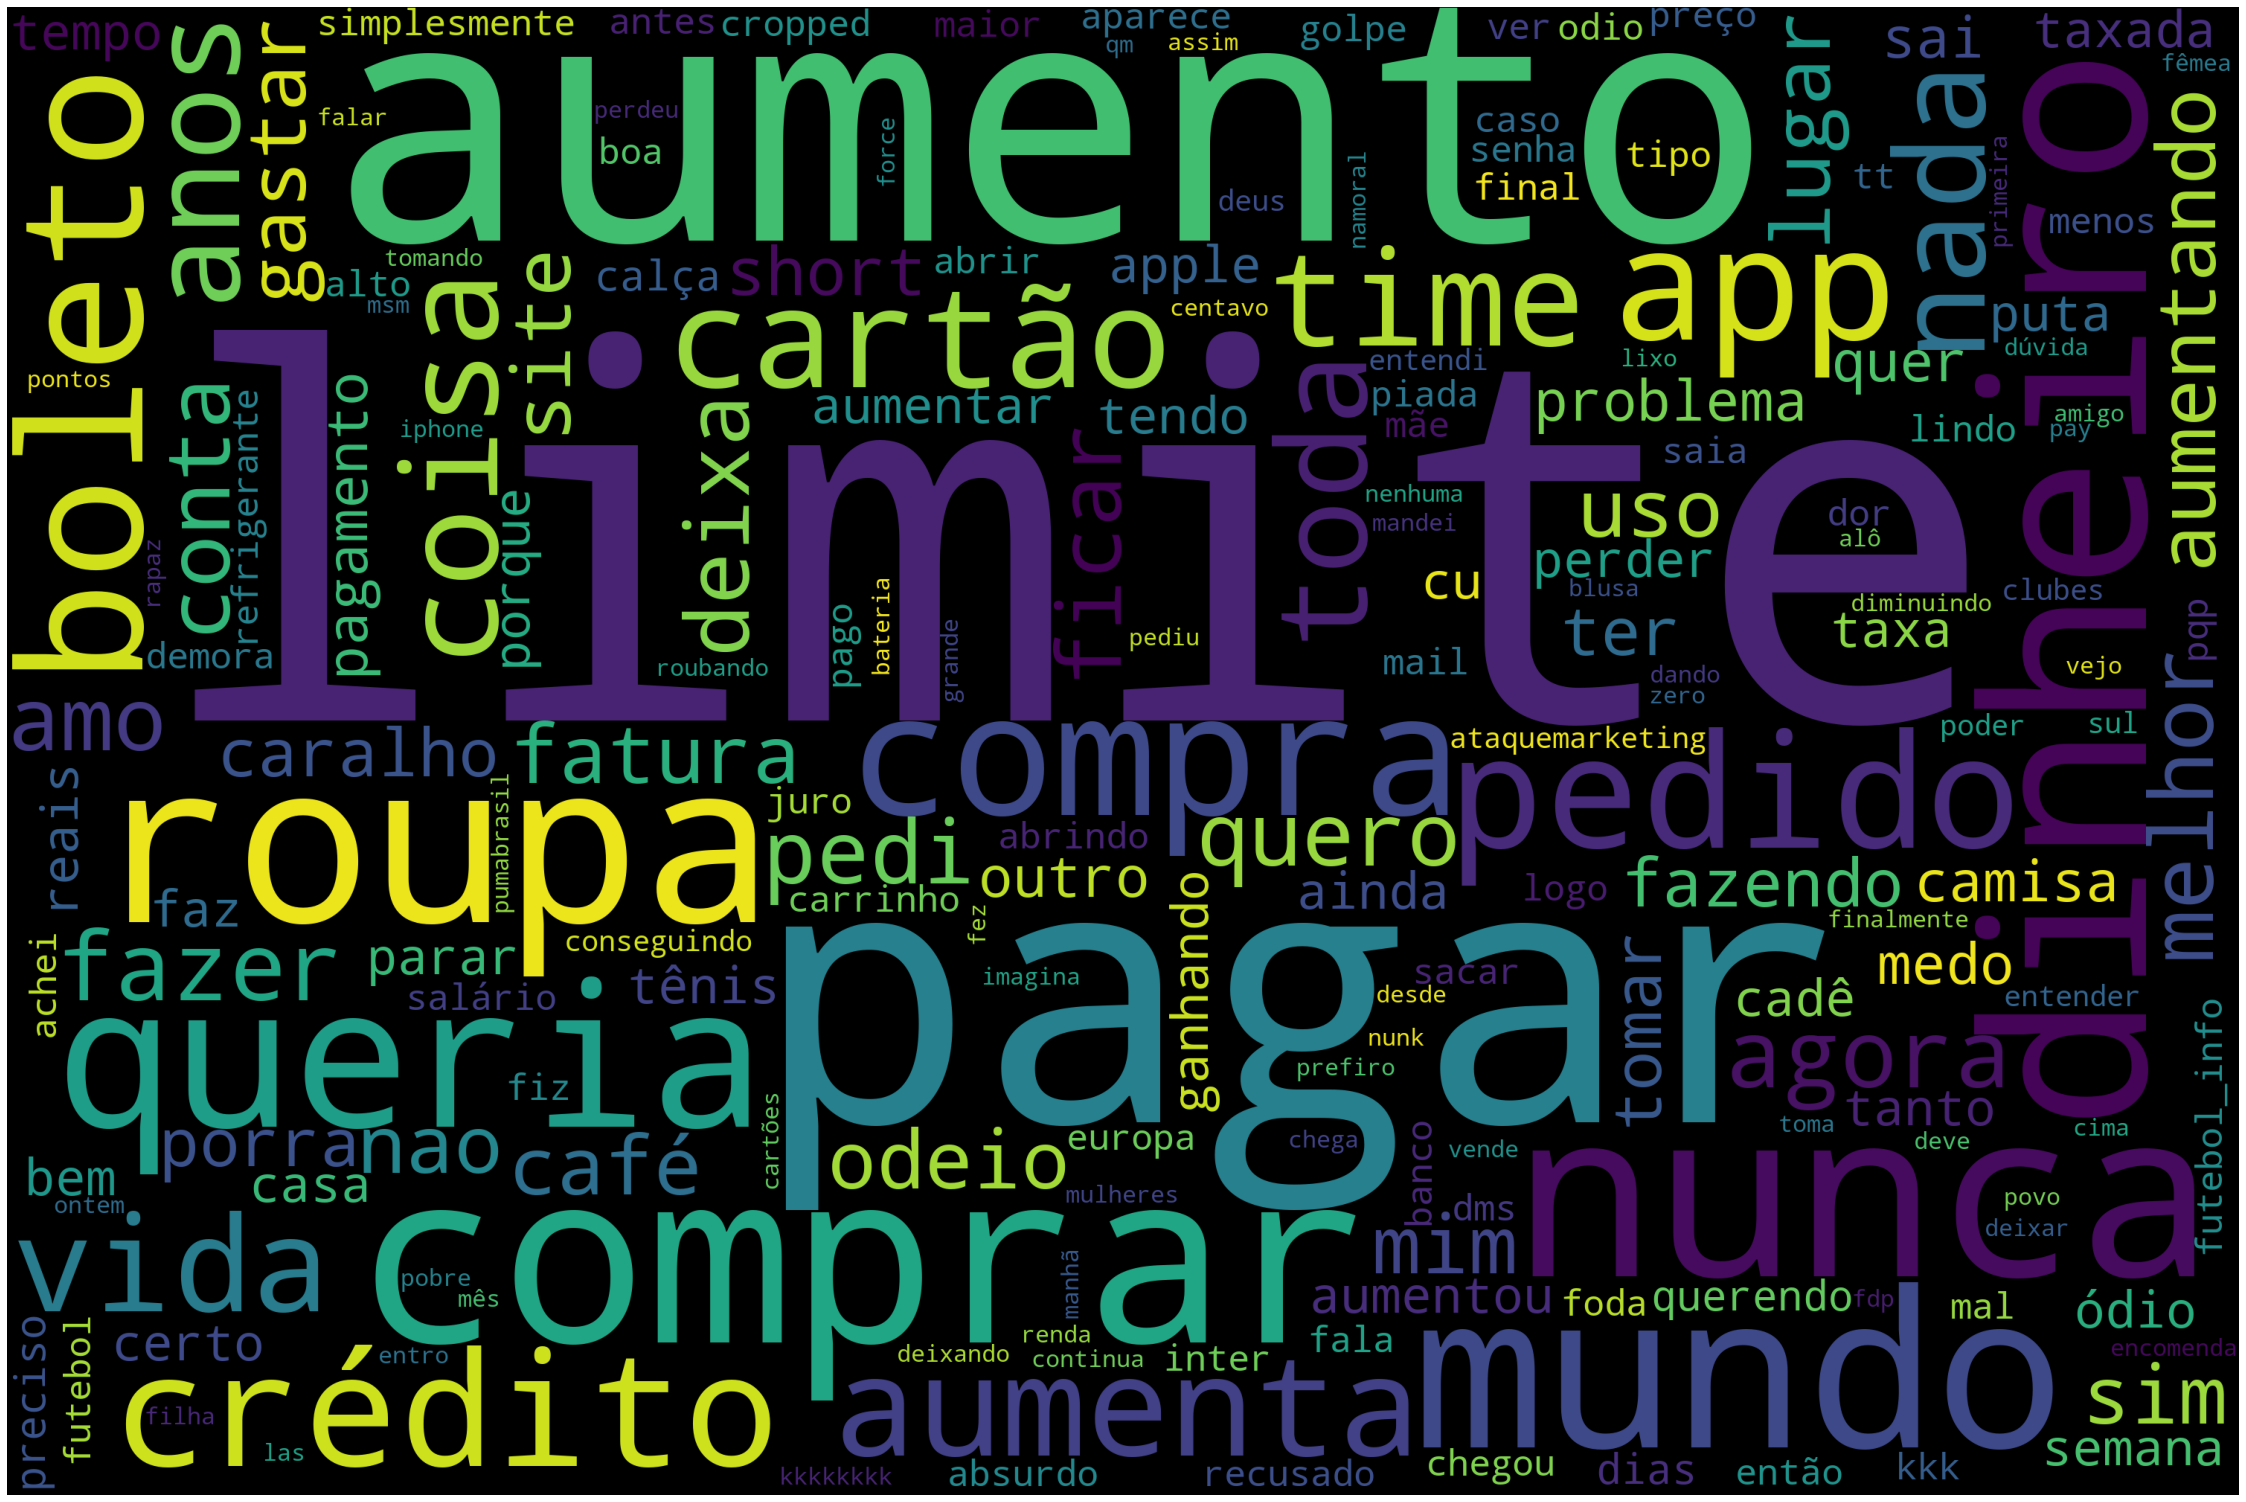

In [211]:
wordcloud_neg = WordCloud(width = 3000, height = 2000, random_state=1,
                      collocations=False).generate(' '.join(df_negative_removed_stopwords['tweet_content']))

plot_cloud(wordcloud_neg)

In [212]:
wordcloud_neg.to_file("img/negative_wordcloud.png")